# Logistic regression
The goal of logistic regression is to classify data using a trained model. Logistic regression is a simple algorithm that does not require a lot of computational power (in contrast to techniques like support vector machines) whilest often perform as well (or even better) than more complex models. Besides just assigning a class, it also calculates the probabilities allowing us to see how confident the model is in a decission.

The goals of this exercise are
* Correctly training and tuning a logistic regression classifier
* Performing classification via logistic regression
* Perform feature engineering
* Interpretting the different performance metrics like accuracy, recall, precision, f1-score, ROC
* Know when you're dealing with under- and overfitting and the ability to make adaptions regarding this


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt                        # To create plots
import numpy as np                                     # To perform calculations quickly
import pandas as pd                                    # To load in and manipulate data
from sklearn.linear_model import LogisticRegression    # Linear model
from sklearn.model_selection import train_test_split   # Split up the data in a train and test set
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import roc_curve,auc
import seaborn as sns


## Breastcancer dataset

https://www.kaggle.com/pranaykankariya/breastcancer-dataset

Target column: diagnosis (Malign or Benign)

In [3]:
# Read in the data
df_cancer=pd.read_csv("data/breast_cancer.csv")
# Take a look at the first rows
df_cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
# Summarize the dataset
df_cancer.describe()
# OR print(data.describe())

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


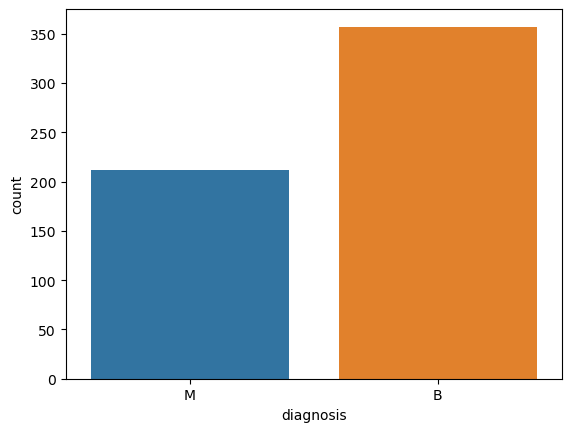

In [5]:
# Create a countplot to determine if the classes are balanced
# Use sns.countplot(data=df_cancer,x='column_of_interest')
sns.countplot(data=df_cancer, x='diagnosis');


In [6]:
# Remove uninformative columns (look at the summary and first rows to determine which columns you should remove)
# axis = 1 -- > Column
# axis = 0 -- > Row
# 1 step
df_cancer.drop(["id", "Unnamed: 32"],axis=1,inplace=True)

# 2 steps
#df_cancer.drop("id",axis=1,inplace=True)
#df_cancer.drop("Unnamed: 32",axis=1,inplace=True)

In [7]:
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


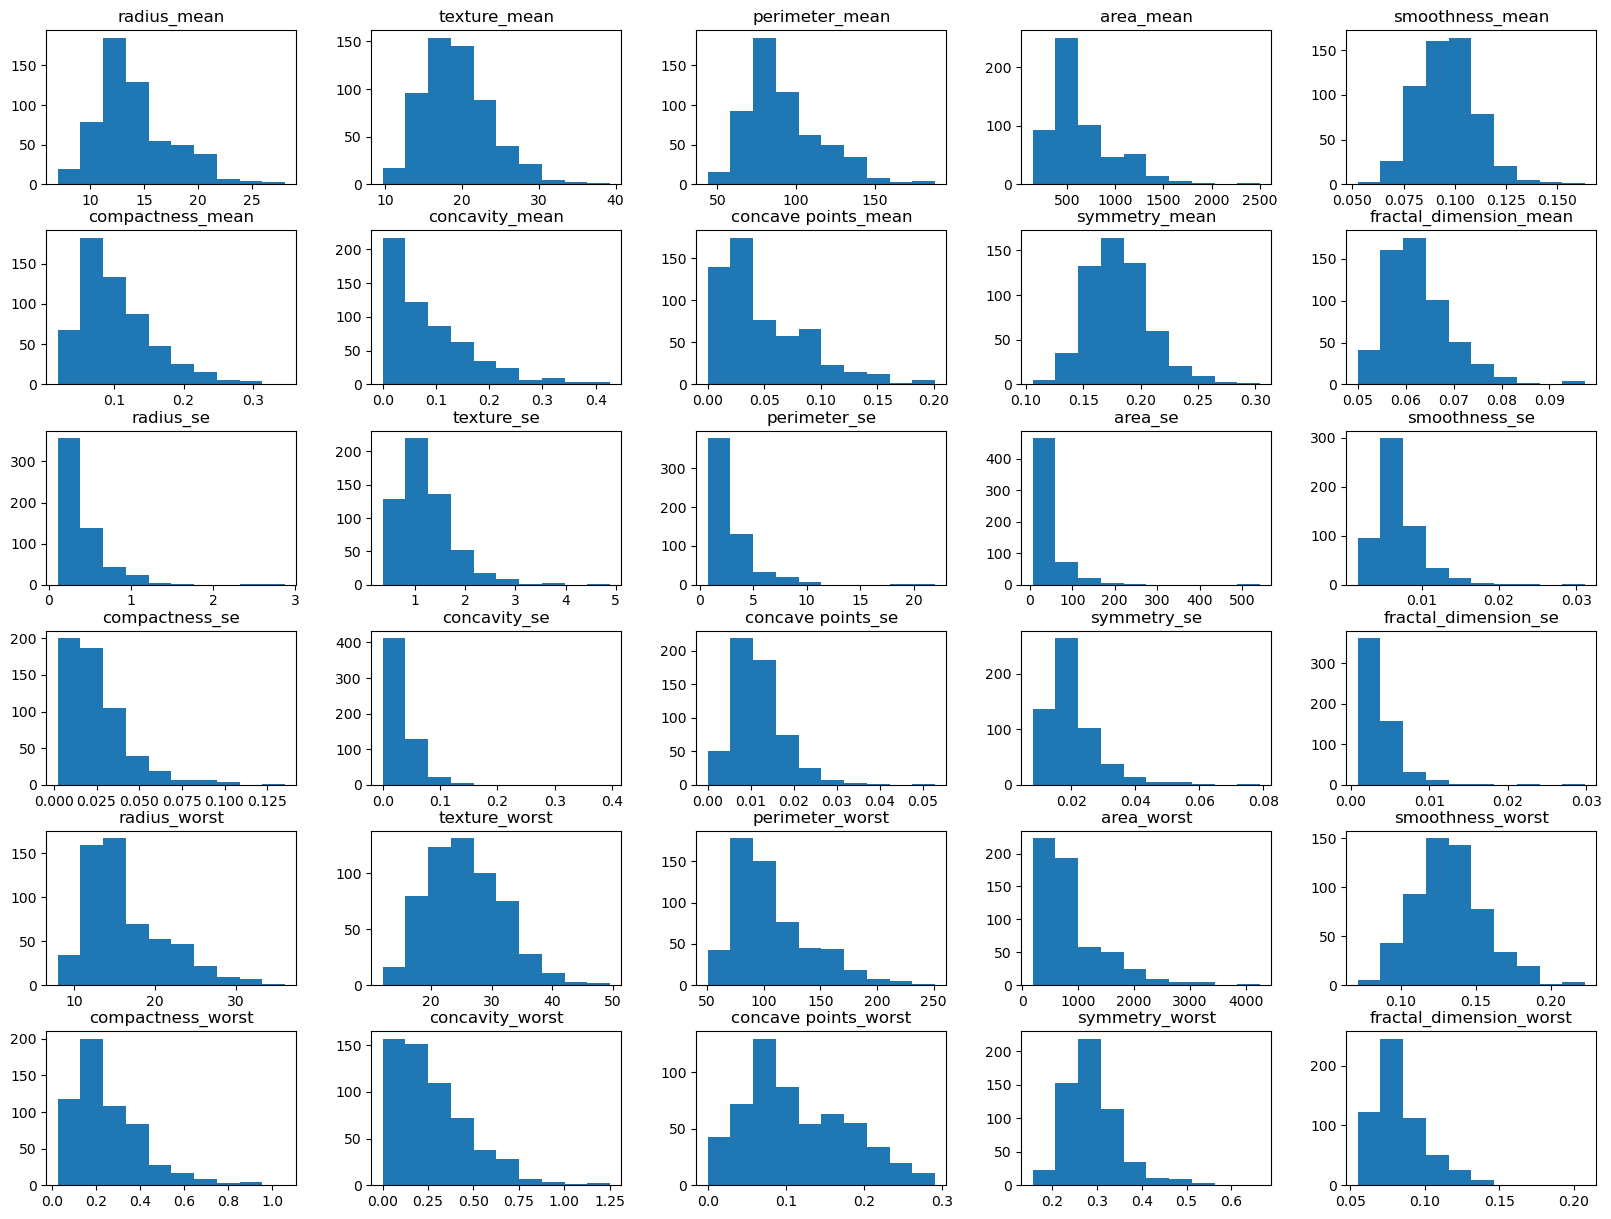

In [8]:
# Create a histogram plot of the different features
# This can be done using the pandas hist function.
# => my_df.hist()
# To increase the size of the figure, you can pass a figsize tupple. (20,15) works good. You can also hide the grid
# with the option "grid=False"
# => my_df.hist(figsize=(20,15),grid=False)

#To hide the plot information you can assign it to a variable, or add a ";" at the end (other options exist)
# => plot = my_df.hist(figsize=(20,15),grid=False)         or       my_df.hist(figsize=(20,15),grid=False);

df_cancer.hist(figsize=(20,15), grid=False);

In [9]:
# Split data into features and targets (or X, y depending on your preference)
# Split the data into features and targets
X = df_cancer.drop("diagnosis",axis=1) # X -- > Features
y = df_cancer["diagnosis"] # y -- > Targets

In [10]:
# Split data into a training and test set
#?train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# Scale the data, use a scaler. You can base your choice on the histogrammes above, or by just trying them out 
from sklearn.preprocessing import StandardScaler

# All scalers follow the same syntax:
# First fit the scaler on X_train: scaler.fit(X_train)                     No fitting on the test set!
# Next transform X_train and X_test using the scaler: 
# X_train=scaler.transform(X_train) and X_test=scaler.transform(X_test)
# Scaling has to eb done only on the features not the targets. 

scaler=StandardScaler()
# Can do this in 2 steps
#scaler.fit(X_train)
#scaler.transform(X_train)

# Now it has an average of 0 and some bit lower and higher -- > .transform
X_train_scaled = scaler.fit_transform(X_train)
# Do not fit the X_test set
# Never FIT the test set -- > Should be example of real life data
X_test_scaled = scaler.transform(X_test)

# Can see that the values are now pushed towards zero.
print(X_test_scaled[0])
print(X_train_scaled[0])

[-0.47941728 -0.14437517 -0.45730213 -0.4940627   0.26193828  0.04169258
 -0.11343408 -0.27799426  0.44382952  0.14685434 -0.03687773 -0.31445335
 -0.1834304  -0.21427108 -0.03948899 -0.34613075 -0.17795805 -0.25475813
 -0.33075055 -0.08112032 -0.27495231 -0.15113631 -0.34165598 -0.35862254
  0.46735255 -0.07755941 -0.01447352 -0.19534853  0.1991247   0.22458893]
[ 0.35581987 -1.72664707  0.41303118  0.20643452  2.15029003  1.0039545
  1.44704623  1.59387704  0.59512712  1.10573954  0.04755004 -1.04864066
 -0.03967257  0.07476777 -0.53388956 -0.12085181  0.34628842  0.19289839
 -0.31843419  0.13524724  0.51102843 -1.40985208  0.52179368  0.37393496
  0.92111217  0.72297281  1.5714011   1.05652305  0.51844283  0.98925483]


In [12]:
import sklearn
sklearn.__version__

'1.2.1'

In [13]:
# Initialize a logistic regression model, fit the data. Start with a C-value of 1
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#Create model >> Train model >> Predict test set
model=LogisticRegression(penalty="l2", C=1) # penalty here is not required since default is l2

model.fit(X_train_scaled,y_train)

LogisticRegression(C=1)

### Model evaluation
In the next section we will evaluate our model using different metrics

0.9868766404199475
0.9787234042553191
[[118   3]
 [  1  66]]
[[235   1]
 [  4 141]]

Y-TEST SET
Accuracy:  0.9787234042553191
Recall:  0.9850746268656716
Precision:  0.9565217391304348
F1-score:  0.9705882352941176

Y-TRAIN SET
Accuracy:  0.9868766404199475
Recall:  0.9724137931034482
Precision:  0.9929577464788732
F1-score:  0.9825783972125435

              precision    recall  f1-score   support

           B       0.99      0.98      0.98       121
           M       0.96      0.99      0.97        67

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



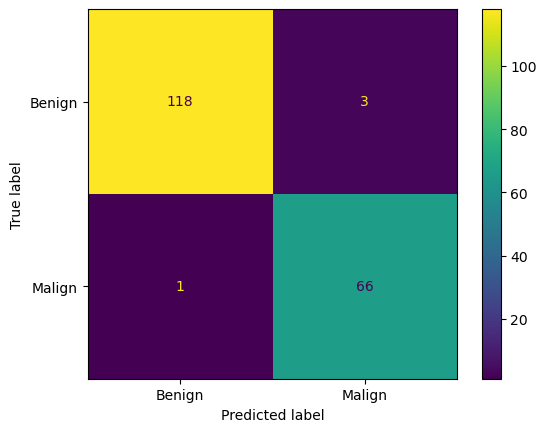

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       236
           M       0.99      0.97      0.98       145

    accuracy                           0.99       381
   macro avg       0.99      0.98      0.99       381
weighted avg       0.99      0.99      0.99       381



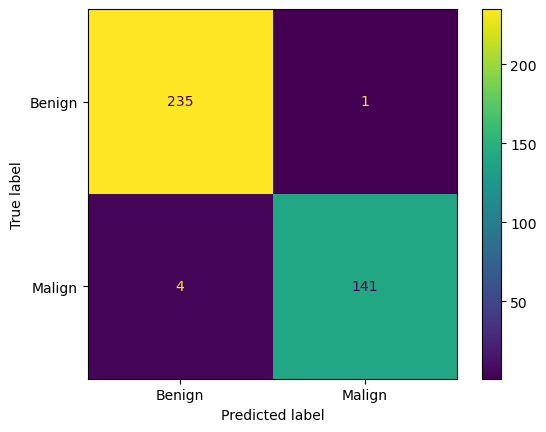

In [14]:
# Check if you have over- or underfitting of your model by comparing the score of the training and test set
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))

# Predict values for the test set
# y_pred is actually we use the X dataset the predict the Y dataset.
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

# Look at the confusion matrix, what do the different values mean in this case?
# Hint: if you don't know the syntax/meaning for a specific funtion, you can always look this up
# in jupyter notebook by executing "?function_name"
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score 
print('='*80)
print(cf_test:= confusion_matrix(y_test,y_pred_test))  
print(cf_train:= confusion_matrix(y_train,y_pred_train))  
print('='*80)

# Show the accuracy, recall, precision and f1-score for the test set
# Note, sometimes you need to supply a positive label (if not working with 0 and 1)
# supply this with "pos_label='label'", in this case, the malign samples are the positives
# When using the true positive have to provide from the dataset using either M or B
# M or Malign used
# pos_label M or B will either use the all values of True Benign or True Malign
print("\nY-TEST SET")
print("Accuracy: ",accuracy_score(y_test, y_pred_test))
print("Recall: ", recall_score(y_test, y_pred_test, pos_label="M"))
print("Precision: ",precision_score(y_test, y_pred_test, pos_label="M"))
print("F1-score: ", f1_score(y_test, y_pred_test, pos_label="M"))
print("\nY-TRAIN SET")
print("Accuracy: ",accuracy_score(y_train, y_pred_train))
print("Recall: ",recall_score(y_train, y_pred_train, pos_label="M"))
print("Precision: ",precision_score(y_train, y_pred_train, pos_label="M"))
print("F1-score: ",f1_score(y_train, y_pred_train, pos_label="M"))
print()
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))


from sklearn.metrics import ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(cf_test,display_labels=["Benign","Malign"]) # Without display_labels it will show class
                                                                         # numbers (0|1)
matrix.plot()
plt.show()

print(classification_report(y_train, y_pred_train))
from sklearn.metrics import ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(cf_train,display_labels=["Benign","Malign"]) # Without display_labels it will show class
                                                                         # numbers (0|1)
matrix.plot()
plt.show()

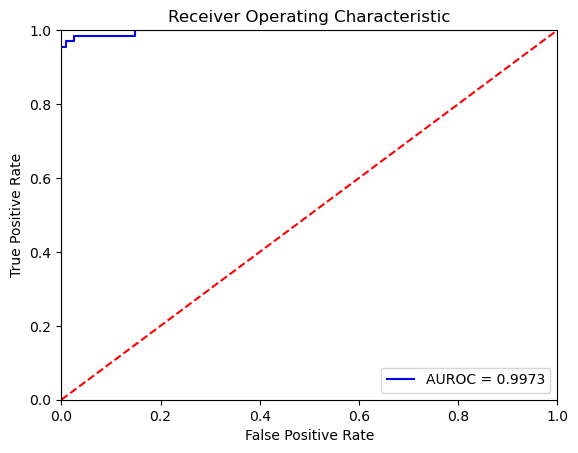

In [15]:
# ROC

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label='M')
roc_auc = metrics.auc(fpr, tpr)

# Plot the roc curce
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
# %0.4f uses 4 dots after komma
plt.plot(fpr, tpr, 'b', label = 'AUROC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Try some different C-values for the model. E.g. 0.0001 and 1000

What do you see in the metrics? what does this mean?


## Wine dataset
https://archive.ics.uci.edu/ml/datasets/Wine
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

The feature of interest is "cultivar"

In [16]:
# Read in the data
df_wine=pd.read_csv("data/wine.csv")
# Take a look at the first rows
df_wine.head(10)

,cultivar,alcohol,malic_acid,ash,alcalinity,magnesium,phenols_total,phenols_flavanoids,phenols_nonflavanoids,proanthocyanins,color_intensity,hue,OD280/OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [17]:
# Show a summary of the data
df_wine.describe()

,cultivar,alcohol,malic_acid,ash,alcalinity,magnesium,phenols_total,phenols_flavanoids,phenols_nonflavanoids,proanthocyanins,color_intensity,hue,OD280/OD315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [18]:
# split into features and targets (X and y)
# Targets creating y-as of only the values from the cultivar column
Features = df_wine.drop("cultivar",axis=1) # X -- > Features
Targets = df_wine["cultivar"] # y -- > Targets

In [19]:
# split into train and test set, keep about 20% of the data to test
X_train, X_test, y_train, y_test = train_test_split(Features, Targets, test_size=0.2, random_state=42)

In [20]:
# scale/normalize the data
# Scale the data, use a scaler. You can base your choice on the histogrammes above, or by just trying them out 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Now it has an average of 0 and some bit lower and higher -- > .transform
X_train_scaled = scaler.fit_transform(X_train)
# Do not fit the X_test set
# Never FIT the test set -- > Should be example of real life data
X_test_scaled = scaler.transform(X_test)

# Can see that the values are now pushed towards zero.
print(X_test_scaled[0])
print(X_train_scaled[0])

[ 0.80873338  0.63731874  0.71578579 -1.24128036  1.06556722  0.64663669
  1.02724237 -1.54932094  0.08936053  0.01825223  0.01551695  1.06613421
  0.36548715]
[ 1.66529275 -0.60840587  1.21896194  1.60540017 -0.16738426  0.80400157
 -0.6916784   1.26722552  1.8775398   3.41947305 -1.65632857 -0.87940904
 -0.24860607]


Accuracy for train:  1.0
Accuracy for test 1.0
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


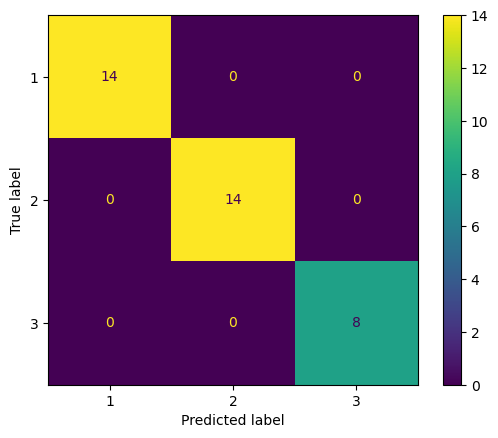


Y-TEST SET
Accuracy:  1.0
Recall:  [1. 1. 1.]
Precision:  [1. 1. 1.]
F1-score:  [1. 1. 1.]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [21]:
# Create a model
model=LogisticRegression(penalty="l2", C=1) # penalty here is not required since default is l2

model.fit(X_train_scaled,y_train)

# Check if you have over- or underfitting of your model by comparing the score of the training and test set
print("Accuracy for train: ",model.score(X_train_scaled,y_train))
print("Accuracy for test", model.score(X_test_scaled, y_test))

# Predict values for the test set
y_pred_test = model.predict(X_test_scaled)

# Look at the confusion matrix, what do the different values mean in this case
# Hint: if you don't know the syntax/meaning for a specific funtion, you can always look this up
# in jupyter notebook by executing "?function_name"
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score 
print('='*80)
print(cf := confusion_matrix(y_test,y_pred_test)) # Note the use of the walrus operator. 
print('='*80)

from sklearn.metrics import ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(cf ,display_labels=model.classes_) # Without display_labels it will show class
                                                                         # numbers (0|1)
matrix.plot()
plt.show()

# Show the accuracy, recall, precision and f1-score for the test set
# Note, since we have multiple classes, we have to provide an average parameter to recall, precision and f1-score
# Using average=None will result in the scores for all classes. To know which classes correspond to which values,
# you can take a look at model.classes_
print("\nY-TEST SET")
print("Accuracy: ",accuracy_score(y_test, y_pred_test))
print("Recall: ", recall_score(y_test, y_pred_test, average=None))
print("Precision: ",precision_score(y_test, y_pred_test, average=None))
print("F1-score: ", f1_score(y_test, y_pred_test, average=None))
print(classification_report(y_test, y_pred_test))